In [4]:
import findspark
findspark.init()
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Flatten_DF").getOrCreate()
print(spark.sparkContext.appName)
print(pyspark.__version__)

21/12/30 15:06:56 WARN Utils: Your hostname, Anishs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.90.85 instead (on interface en0)
21/12/30 15:06:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/30 15:06:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Flatten_DF


In [3]:
#!pip install sparkaid

In [5]:
from sparkaid import flatten as flat
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pyspark.pandas as ppd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# path = "C:/Users/PETERCHAPAGAIN/Downloads/vericred_ambetter/vericred_ambetter.json"
path = "/Users/anishchapagain/Downloads/vericred_healthpartner_WI_20211108.json"
#path = "C:/pyqt/data/imperial_health_plan.json"

In [5]:
df = spark.read.json(path=path)

In [6]:
df.printSchema()
df.count()

root
 |-- addresses: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- address_string: string (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- languages: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- name: string (nullable = true)
 |    |    |    |    |-- type: string (nullable = true)
 |    |    |-- office_name: string (nullable = true)
 |    |    |-- phones: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- type: string (nullable = true)
 |    |    |    |    |-- value: string (nullable = true)
 |    |    |-- state: string (nullable = true)
 |    |    |-- street_line_1: string (nullable = true)
 |    |    |-- street_line_2: string (nullable = true)
 |    |    |-- zip: string (nullable = true)
 |-- group_affiliations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- 

1113953

In [7]:
df.distinct().count()

1113953

In [8]:
df.show(5)

+--------------------+------------------+---------------------+--------------------+--------------------+----------------+
|           addresses|group_affiliations|hospital_affiliations|            networks|            provider|     specialties|
+--------------------+------------------+---------------------+--------------------+--------------------+----------------+
|[{149 N Main St, ...|                []|                   []|[{Medicare Advant...|{true, null, null...|[{Chiropractic}]|
|[{407 W Knapp St,...|                []|                   []|[{Medicare Advant...|{true, null, null...|[{Chiropractic}]|
|[{W502 Spur Ln, F...|                []|                   []|[{Medicare Advant...|{true, null, null...|[{Chiropractic}]|
|[{107 N Bridge St...|                []|                   []|[{Medicare Advant...|{true, null, null...|[{Chiropractic}]|
|[{124 2nd St, Par...|                []|                   []|[{Medicare Advant...|{true, null, null...|[{Chiropractic}]|
+---------------

In [9]:
df.select('provider.unparsed_name').show(3)

+------------------+
|     unparsed_name|
+------------------+
|       Jon T. Wall|
|Steven D. Crotteau|
|    Kyle W. Grimes|
+------------------+
only showing top 3 rows



In [10]:
df.select('addresses.zip').show(3,truncate=False)

+-------+
|zip    |
+-------+
|[53910]|
|[54868]|
|[54629]|
+-------+
only showing top 3 rows



In [11]:
df.select('addresses.address_string').show(3,truncate=False)

+---------------------------------------+
|address_string                         |
+---------------------------------------+
|[149 N Main St, Adams, WI 53910]       |
|[407 W Knapp St, Rice Lake, WI 54868]  |
|[W502 Spur Ln, Fountain City, WI 54629]|
+---------------------------------------+
only showing top 3 rows



In [12]:
siteuid = df.select('provider.site_uid').distinct()

In [13]:
siteuid.count()

1113953

In [14]:
siteuid.show(15)

+------------+
|    site_uid|
+------------+
|0a0a1372c1e8|
|557c54bbcdde|
|8ca6e045df55|
|96431cf081b1|
|a8392a72387c|
|b83dd47411ee|
|c44f84197cb1|
|11244d1faf0e|
|cea56c3182a0|
|d0552db591ec|
|c016d549dc5c|
|fe86918a8ac8|
|ab8885182fb9|
|3e6dd9b2f577|
|9631644b0fc7|
+------------+
only showing top 15 rows



In [15]:
df.filter(col("provider.site_uid")=='11244d1faf0e').filter(col('addresses_phones'))select(['addresses','networks','provider','specialties']).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+-------------------------+
|addresses                                                                                                                        |networks                                                 |provider                                                                                                                   |specialties              |
+---------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+-------

In [16]:
flatdf = flat(df)

In [17]:
flatdf.printSchema()

root
 |-- addresses_address_string: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- addresses_city: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- addresses_languages_name: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- addresses_languages_type: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- addresses_office_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- addresses_phones_type: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- addresses_phones_value: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- addresses_state: array (nullable = true)
 |    |-- element: string (containsNul

In [19]:
flatdf.groupBy(col("networks_name")).count().orderBy(col('count').desc()).show(20,truncate=False) #value_count

+-----------------------------------------------------+-----+
|networks_name                                        |count|
+-----------------------------------------------------+-----+
|[Open Access]                                        |84457|
|[2021 Distinctions II]                               |84120|
|[2020 Distinctions III]                              |84101|
|[2021 Distinctions III]                              |83996|
|[CentraChoice]                                       |83732|
|[Perform]                                            |83178|
|[2020 Distinctions II]                               |83022|
|[Perform SE]                                         |81853|
|[CentraChoice SE]                                    |70552|
|[AchieveSM SE]                                       |70031|
|[AchieveSM]                                          |68767|
|[HealthPartners Primary Clinic]                      |42151|
|[Robin Oak]                                          |31025|
|[Health

In [21]:
flatdfnetworks = flatdf.groupBy(col("networks_name")).count().orderBy(col('count').desc())#.show(30,truncate=False) #value_count
flatdfnetworks.show(10) 

+--------------------+-----+
|       networks_name|count|
+--------------------+-----+
|       [Open Access]|84457|
|[2021 Distinction...|84120|
|[2020 Distinction...|84101|
|[2021 Distinction...|83996|
|      [CentraChoice]|83732|
|           [Perform]|83178|
|[2020 Distinction...|83022|
|        [Perform SE]|81853|
|   [CentraChoice SE]|70552|
|      [AchieveSM SE]|70031|
+--------------------+-----+
only showing top 10 rows



In [20]:
networks = df.select(explode(df.networks)).select('col.name','col.tier') #col: API name
networks.show(10) 

+--------------------+----+
|                name|tier|
+--------------------+----+
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
|Medicare Advantag...|    |
+--------------------+----+
only showing top 10 rows



In [46]:
networks = networks.groupBy(col("name")).count().orderBy(col('count').desc())#.show(30,truncate=False) #value_count

In [22]:
dfNetwork = flatdfnetworks.toPandas()#show(35,truncate=False).toPandas() #value_countnetworks

In [65]:
def writeToFile(df,fName,opDir,mode):
    import os
    if not os.path.exists(opDir):
        os.makedirs(opDir)
        print("Directory Created")       
    
    if mode=='csv':
        df.write.mode('Overwrite').csv(opDir)    
    else:
        df.write.mode('Overwrite').json(opDir)
        
    fs = spark._jvm.org.apache.hadoop.fs.FileSystem.get(spark._jsc.hadoopConfiguration())
    list_status = fs.listStatus(spark._jvm.org.apache.hadoop.fs.Path(opDir))
    print(list_status)
    file_name = [file.getPath().getName() for file in list_status if file.getPath().getName().startswith('part-')][0]
    print("Renaming "+file_name+" .... ")
    fs.rename(spark._jvm.org.apache.hadoop.fs.Path(opDir+'/'+file_name),spark._jvm.org.apache.hadoop.fs.Path(opDir+'/'+fName))
    

In [67]:
writeToFile(flatdfnetworks,'test.json','output','json')

Directory Created


[Lorg.apache.hadoop.fs.FileStatus;@603d9579
Renaming part-00000-2f0b61a5-dd00-477e-8361-d8739a1d1b4c-c000.json .... 


In [46]:
type(dfNetwork)

pandas.core.frame.DataFrame

In [24]:
dfNetwork

,networks_name,count
0,[Open Access],84457
1,[2021 Distinctions II],84120
2,[2020 Distinctions III],84101
3,[2021 Distinctions III],83996
4,[CentraChoice],83732
5,[Perform],83178
6,[2020 Distinctions II],83022
7,[Perform SE],81853
8,[CentraChoice SE],70552
9,[AchieveSM SE],70031


<AxesSubplot:ylabel='networks_name'>

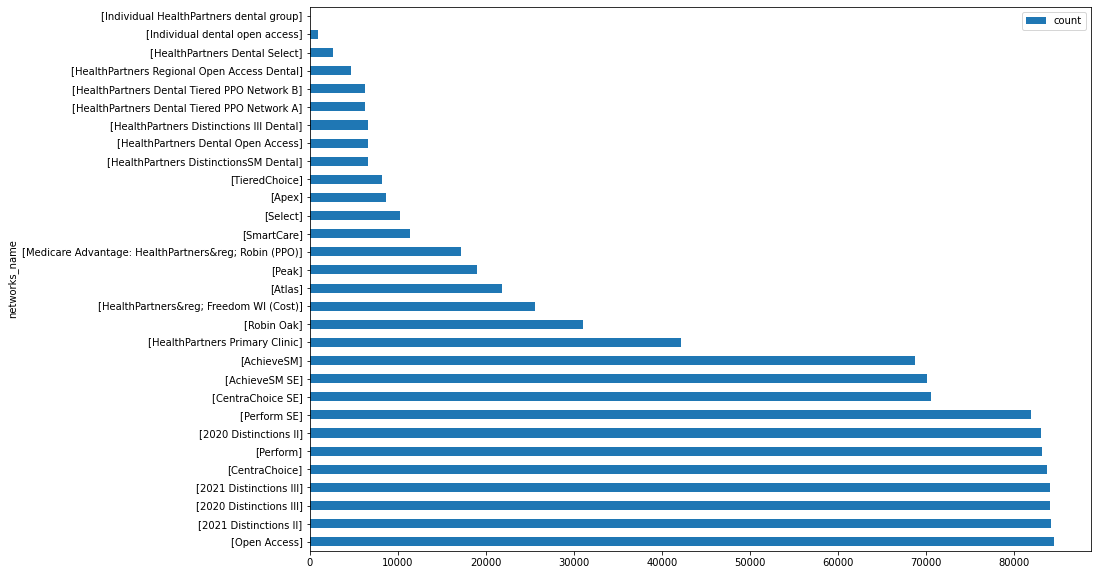

In [26]:
dfNetwork.set_index('networks_name').plot(kind='barh',figsize=(14,10))

In [94]:
flatdf.select('addresses_address_string').show(truncate=True)

+------------------------+
|addresses_address_string|
+------------------------+
|    [149 N Main St, A...|
|    [407 W Knapp St, ...|
|    [W502 Spur Ln, Fo...|
|    [107 N Bridge St,...|
|    [124 2nd St, Pard...|
|    [1121 BellWest Bl...|
|    [1009 Egg Harbor ...|
|    [5919 Tower Ave, ...|
|    [723 Park Ridge L...|
|    [12225 71st St, K...|
|    [436 Superior St,...|
|    [218 S Highway 14...|
|    [W9330 State Road...|
|    [333 E 2nd St, Ri...|
|    [1813 Ashland Ave...|
|    [522 Gateway Ave ...|
|    [1801 W Knapp St ...|
|    [W502 Spur Ln, Fo...|
|    [17 W Spring St, ...|
|    [440 E Albert St,...|
+------------------------+
only showing top 20 rows



In [27]:
aaron = flatdf.filter(col("provider_unparsed_name")=="Jon T. Wall")\
.select('addresses_address_string','addresses_street_line_1','addresses_zip','hospital_affiliations_name',
        'group_affiliations_name','specialties_name','networks_name','networks_tier')\
#.show(truncate=False)
# .distinct()

In [28]:
aaron.first()

Row(addresses_address_string=['149 N Main St, Adams, WI 53910'], addresses_street_line_1=['149 N Main St'], addresses_zip=['53910'], hospital_affiliations_name=[], group_affiliations_name=[], specialties_name=['Chiropractic'], networks_name=['Medicare Advantage: HealthPartners&reg; Robin (PPO)'], networks_tier=[''])

In [29]:
len(aaron.head(5))>0

True

In [30]:
aaron.count() #try len

38

In [31]:
aaron.printSchema()

root
 |-- addresses_address_string: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- addresses_street_line_1: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- addresses_zip: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- hospital_affiliations_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- group_affiliations_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- specialties_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- networks_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- networks_tier: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [32]:
aaron.select(
    col('addresses_street_line_1').getItem(0),
    col('addresses_zip').getItem(0),
    col('specialties_name').getItem(0),
    col('networks_name').getItem(0),col('networks_tier').getItem(0)     
).show(truncate=False)

+--------------------------+----------------+-------------------+---------------------------------------------------+----------------+
|addresses_street_line_1[0]|addresses_zip[0]|specialties_name[0]|networks_name[0]                                   |networks_tier[0]|
+--------------------------+----------------+-------------------+---------------------------------------------------+----------------+
|149 N Main St             |53910           |Chiropractic       |Medicare Advantage: HealthPartners&reg; Robin (PPO)|                |
|400 East St Ste 101       |54670           |Chiropractic       |Medicare Advantage: HealthPartners&reg; Robin (PPO)|                |
|149 N Main St             |53910           |Chiropractic       |HealthPartners&reg; Freedom WI (Cost)              |                |
|400 East St Ste 101       |54670           |Chiropractic       |HealthPartners&reg; Freedom WI (Cost)              |                |
|149 N Main St             |53910           |Chiropract

In [33]:
aaron.select('networks_name',size(col('networks_name'))).show()

+--------------------+-------------------+
|       networks_name|size(networks_name)|
+--------------------+-------------------+
|[Medicare Advanta...|                  1|
|[Medicare Advanta...|                  1|
|[HealthPartners&r...|                  1|
|[HealthPartners&r...|                  1|
|       [Open Access]|                  1|
|       [Open Access]|                  1|
|        [Perform SE]|                  1|
|        [Perform SE]|                  1|
|           [Perform]|                  1|
|           [Perform]|                  1|
|      [AchieveSM SE]|                  1|
|      [AchieveSM SE]|                  1|
|         [AchieveSM]|                  1|
|         [AchieveSM]|                  1|
|   [CentraChoice SE]|                  1|
|   [CentraChoice SE]|                  1|
|[2021 Distinction...|                  1|
|[2021 Distinction...|                  1|
|[2020 Distinction...|                  1|
|[2020 Distinction...|                  1|
+----------

In [44]:
aaron.select('addresses_street_line_1',size('addresses_street_line_1').alias('total_address'),
             'networks_name',size(col('networks_name').alias('total_network'))).show()

+-----------------------+-------------+--------------------+------------------------------------+
|addresses_street_line_1|total_address|       networks_name|size(networks_name AS total_network)|
+-----------------------+-------------+--------------------+------------------------------------+
|   [2610 S Interstat...|            4|[Allwell Dual Med...|                                   1|
|   [2610 S Interstat...|            4|[Allwell Dual Med...|                                   1|
|   [3807 Spicewood S...|            4|[Allwell Medicare...|                                   1|
|   [3807 Spicewood S...|            4|[Allwell Medicare...|                                   1|
|   [3807 Spicewood S...|            4|[Allwell Medicare...|                                   1|
|   [2610 S Interstat...|            4|[Allwell Medicare...|                                   1|
|   [3807 Spicewood S...|            4|[Allwell Medicare...|                                   1|
|   [2610 S Intersta

In [36]:
aaron.columns

['addresses_address_string',
 'addresses_street_line_1',
 'addresses_zip',
 'hospital_affiliations_name',
 'group_affiliations_name',
 'specialties_name',
 'networks_name',
 'networks_tier']

In [37]:
aaron.select('addresses_address_string','hospital_affiliations_name','specialties_name','networks_name').distinct().count()

38

In [62]:
aaron.select('addresses_address_string','specialties_name','networks_name').distinct().show(truncate=False)
aaron.select('addresses_address_string','specialties_name','networks_name').distinct().count()

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+-----------------------------------------+
|addresses_address_string                                                                                                                                                                          |specialties_name|networks_name                            |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+-----------------------------------------+
|[2610 S Interstate 35, Austin, TX 78704, 3807 Spicewood Springs Road Suite 101, Austin, TX 78759, 4010 Sandy Brook Drive, Suite 105, Round Rock, TX 78665, 5401 Fm 1626 Suite 365, Kyle, TX 78640]|[Ophthalmology] |[Allwell Dual Medic

15

In [48]:
street1 = aaron.select('addresses_street_line_1')

In [55]:
street1.select('addresses_street_line_1').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------+
|addresses_street_line_1                                                                                      |
+-------------------------------------------------------------------------------------------------------------+
|[2610 S Interstate 35, 3807 Spicewood Springs Road Suite 101, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[2610 S Interstate 35, 3807 Spicewood Springs Road Suite 101, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[3807 Spicewood Springs Road Suite 101, 2610 S Interstate 35, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[3807 Spicewood Springs Road Suite 101, 2610 S Interstate 35, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[3807 Spicewood Springs Road Suite 101, 2610 S Interstate 35, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[2610 S Interstate 35, 3807 Spicewood Springs Road Suite 101, 4010 Sandy Brook Drive, 5401 Fm 1626 Suit

In [54]:
street1.select('addresses_street_line_1').distinct().show(truncate=False)

+-------------------------------------------------------------------------------------------------------------+
|addresses_street_line_1                                                                                      |
+-------------------------------------------------------------------------------------------------------------+
|[2610 S Interstate 35, 3807 Spicewood Springs Road Suite 101, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[3807 Spicewood Springs Road Suite 101, 2610 S Interstate 35, 4010 Sandy Brook Drive, 5401 Fm 1626 Suite 365]|
|[2610 S Interstate 35, 5401 Fm 1626 Suite 365, 4010 Sandy Brook Drive, 3807 Spicewood Springs Road Suite 101]|
|[5401 Fm 1626 Suite 365, 2610 S Interstate 35, 4010 Sandy Brook Drive, 3807 Spicewood Springs Road Suite 101]|
|[4010 Sandy Brook Drive, 3807 Spicewood Springs Road Suite 101, 5401 Fm 1626 Suite 365, 2610 S Interstate 35]|
|[2610 S Interstate 35, 3807 Spicewood Springs Road Suite 101, 5401 Fm 1626 Suite 365, 4010 Sandy Brook 

In [72]:
# streets = aaron.select("addresses_street_line_1").withColumn("streets",explode('addresses_street_line_1')).drop("addresses_street_line_1")

In [27]:
streets = df.select(flatten("addresses.languages").alias('language'))

In [28]:
streets.printSchema()

root
 |-- language: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- type: string (nullable = true)



In [85]:
streets.select('*').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|language                    

In [29]:
del flataaron

NameError: name 'flataaron' is not defined

In [42]:
flataaron

NameError: name 'flataaron' is not defined

In [43]:
aaron.unpersist()

DataFrame[addresses_street_line_1: array<string>, addresses_zip: array<string>, hospital_affiliations_name: array<string>, group_affiliations: array<string>, specialties_name: array<string>, networks_name: array<string>, networks_tier: array<string>]